## Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [235]:
df=pd.read_csv("D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Clustering\\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [237]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Using Hierarchical clustering

In [238]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_norm=scaler.fit_transform(df.iloc[:,1:])

In [239]:
df_norm=pd.DataFrame(df_norm,columns=df.iloc[:,1:].columns)
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


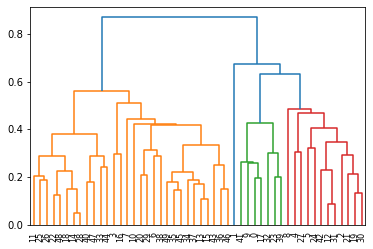

In [240]:
#creat dendrogram
dend=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [241]:
#creat cluster  (k is subjective)
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')#chooosing no. of clusters depends upon domain
y_hc=hc.fit_predict(df_norm)

In [242]:
cluster=pd.DataFrame(y_hc,columns=['cluster'])
#cluster

In [243]:
df_norm['h_clusterid']=hc.labels_
df_norm.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0


In [244]:
df_norm.groupby(['h_clusterid']).count()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,20,20,20,20
1,20,20,20,20
2,10,10,10,10


## Using K-Mean clustering

In [245]:
from sklearn.cluster import KMeans

In [246]:
#first choose k(no. of clusters)
wcss=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i,random_state=0)
    kmean.fit(df_norm)
    wcss.append(kmean.inertia_)
#wcss

Text(0, 0.5, 'WCSS')

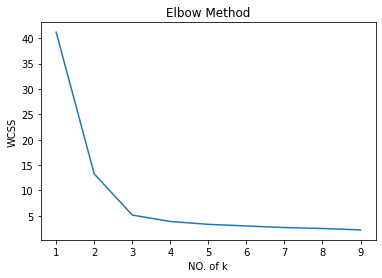

In [247]:
plt.plot(range(1,10),wcss)
plt.title("Elbow Method");plt.xlabel("NO. of k");plt.ylabel("WCSS")

#### From Elbow graph we can choose value of k is 4 or 5

In [248]:
#Build cluster algorithm
clusters_new=KMeans(3,random_state=2)
clusters_new.fit(df_norm)

KMeans(n_clusters=3, random_state=2)

In [249]:
clusters_new.labels_

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 2, 2])

In [250]:
df['clusterid-new']=clusters_new.labels_
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid-new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [251]:
clusters_new.cluster_centers_

array([[ 6.84638554e-01,  7.20034247e-01,  6.16949153e-01,
         5.64987080e-01, -2.22044605e-16],
       [ 1.43373494e-01,  1.15410959e-01,  2.93220339e-01,
         1.11886305e-01,  2.00000000e+00],
       [ 2.96084337e-01,  2.98972603e-01,  6.57627119e-01,
         2.79069767e-01,  1.00000000e+00]])

In [252]:
df.groupby(['clusterid-new']).count()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
clusterid-new,,,,,
0,20,20,20,20,20
1,10,10,10,10,10
2,20,20,20,20,20


In [253]:
df.groupby(['clusterid-new']).agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusterid-new,,,,
0,12.165,255.25,68.4,29.165
1,3.180,78.70,49.3,11.630
2,5.715,132.30,70.8,18.100


### We observed that in first cluster(cluster id 0) MAXIMUM crime persons are there (because murder rate,assauit rate and rape rate are high as compare with urban population rate) followed by thired cluster(cluster id 2) and then second cluster(cluster id 1)

### In second cluster(cluster id 1) crime persons are less as compared with other clusters